In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [16]:
data_table = pd.read_csv('iris.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'])

In [17]:
iris_data_multiclass = pd.read_csv('iris_multiclasse.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower1','flower2','flower3'])

In [18]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [19]:
matrix_x = np.array(data_table[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vetor_y = np.array(data_table['flower'])

In [20]:
matrix_x, vetor_y = normalization(matrix_x, vetor_y)

In [21]:
matrix_x = np.insert(matrix_x, 0, 1, axis =1)

In [22]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def gradienteDescendente(matrix_x, vetor_y, epocas, alfa):
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    mse = []
    for epoca in range(epocas):
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            somatorio += (vetor_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]

        mse.append((-1/matrix_x.shape[0]) * somatorio)
        w_matrix = w_matrix + (alfa/matrix_x.shape[0])*somatorio
        y_chapeu = matrix_x.dot(w_matrix)

    return w_matrix, mse

In [24]:
w_gd, mse = gradienteDescendente(matrix_x, vetor_y, 10000, 0.001)

In [25]:
w_gd

array([-3.91003605,  4.57163632, -2.83945175,  6.0195785 ,  5.98391617])

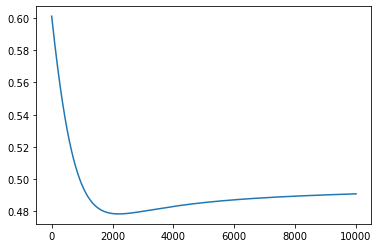

In [26]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [27]:
predicoes = []
for i in range(matrix_x.shape[0]):
    if(sigmoide(matrix_x[i].dot(w_gd))>0.5):
        predicoes.append(1)
    else:
        predicoes.append(0)

print(predicoes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
def gradiente_estocastico(matrix_x, vetor_y, epocas, alfa):
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    data =np.append(matrix_x, np.split(vetor_y, matrix_x.shape[0], axis=0), axis=1)
    mse = []

    for epoca in range(epocas):
        erro = 0
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            w_matrix  = w_matrix + alfa * (vetor_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]
            somatorio += (vetor_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]
        
        mse.append((-1/matrix_x.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        matrix_x = data[: ,0:matrix_x.shape[1]]
        vetor_y = data[:,matrix_x.shape[1]]
        
        y_chapeu = matrix_x.dot(w_matrix)  
    
    return w_matrix, mse

In [29]:
w_gde, mse = gradiente_estocastico(matrix_x, vetor_y, 10000, 0.001)

[array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), 

In [30]:
w_gde

array([-498.47703627,  364.70980605, -342.06964503,  486.27425106,
        481.44881975])

In [31]:
predicoes = []
for i in range(matrix_x.shape[0]):
    if(sigmoide(matrix_x[i].dot(w_gde))>0.5):
        predicoes.append(1)
    else:
        predicoes.append(0)

print(predicoes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
matrix_x_multiclass = np.array(iris_data_multiclass[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vetor_y_multiclass = np.array(iris_data_multiclass[['flower1', 'flower2', 'flower3']])

In [33]:
matrix_x_multiclass, vetor_y_multiclass = normalization(matrix_x_multiclass, vetor_y_multiclass)

In [34]:
matrix_x_multiclass = np.insert(matrix_x_multiclass, 0, 1, axis =1)

In [85]:
def gradiente_descendente_multiclasse(matrix_x, vetor_y, epocas, alfa):
    size = (vetor_y.shape[1], matrix_x.shape[1])
    w_matrix = np.ones(size, dtype=float)

    mse = []
    for k in range(w_matrix.shape[0]):  
        for epoca in range(epocas):
            somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
                
                err = np.exp(w_matrix[k].dot(matrix_x[i]))/_sum
                somatorio += (vetor_y[i][k] - err) * matrix_x[i]
            
            mse.append((-1/matrix_x.shape[0]) * somatorio)
            w_matrix[k] = w_matrix[k] + (alfa/matrix_x.shape[0])*somatorio

    return w_matrix, mse

In [86]:
w_gd_m, mse = gradiente_descendente_multiclasse(matrix_x_multiclass, vetor_y_multiclass, 10000, 0.01)

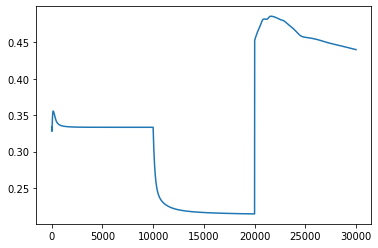

In [88]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [42]:
size = (matrix_x_multiclass.shape[0], vetor_y_multiclass.shape[1])
predicoes = np.ones(size, dtype=float)
for k in range(w_gd_m.shape[0]):   
    for i in range(matrix_x_multiclass.shape[0]):
        a = np.exp(w_gd_m[k].dot(matrix_x_multiclass[i]))
        b = 0
        for j in range(w_gd_m.shape[0]):
            b = b + np.exp(w_gd_m[j].dot(matrix_x_multiclass[i]))
        predicoes[i][k] = a/b

for i in range(predicoes.shape[0]):
    index = np.argmax(predicoes[i], axis=0)
    for j in range(len(predicoes[i])):
        if(j == index):
            predicoes[i][index] = 1.0
        else:
            predicoes[i][j] = 0.0

print(predicoes)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [80]:
def gradiente_estocastico_multiclass(matrix_x, vetor_y, epocas, alfa):
    
    size = (vetor_y.shape[1], matrix_x.shape[1])    
    w_matrix = np.ones(size, dtype=float)
    #y_chapeu = matrix_x.dot(w_matrix)
    #data =np.append(matrix_x, np.split(vetor_y, matrix_x.shape[0], axis=0), axis=1)

    data =np.append(matrix_x, vetor_y, axis=1)
    
    mse = []

    for k in range(w_matrix.shape[0]):
        for epoca in range(epocas):
            #somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
        
                err = np.exp(w_matrix[k].dot(matrix_x[i]))/_sum
                
                w_matrix[k] = w_matrix[k] + alfa * (vetor_y[i][k] - err) * matrix_x[i]
                #somatorio += (vetor_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]

            #mse.append((-1/matrix_x.shape[0]) * somatorio)        
            data = np.random.permutation(data)
            matrix_x = data[: ,0:matrix_x.shape[1]]
            vetor_y = data[:,matrix_x.shape[1]:]
                
    return w_matrix, mse

In [82]:
w_gde_m, mse = gradiente_estocastico_multiclass(matrix_x_multiclass, vetor_y_multiclass, 10000, 0.0001)

[[-49.0990762  -56.0370963   48.51865288 -72.44133631 -69.63947435]
 [  1.           1.           1.           1.           1.        ]
 [  1.           1.           1.           1.           1.        ]]
[[-49.0990762  -56.0370963   48.51865288 -72.44133631 -69.63947435]
 [-31.74324649   4.43014345 -30.74180214  12.23140452   3.57585036]
 [  1.           1.           1.           1.           1.        ]]
[[-49.0990762  -56.0370963   48.51865288 -72.44133631 -69.63947435]
 [-31.74324649   4.43014345 -30.74180214  12.23140452   3.57585036]
 [-68.2658333   39.63788947 -12.13954131  50.87375976  56.98500431]]


In [83]:
w_gde_m

array([[-49.0990762 , -56.0370963 ,  48.51865288, -72.44133631,
        -69.63947435],
       [-31.74324649,   4.43014345, -30.74180214,  12.23140452,
          3.57585036],
       [-68.2658333 ,  39.63788947, -12.13954131,  50.87375976,
         56.98500431]])

In [84]:
size = (matrix_x_multiclass.shape[0], vetor_y_multiclass.shape[1])
predicoes = np.ones(size, dtype=float)
for k in range(w_gde_m.shape[0]):   
    for i in range(matrix_x_multiclass.shape[0]):
        a = np.exp(w_gde_m[k].dot(matrix_x_multiclass[i]))
        b = 0
        for j in range(w_gde_m.shape[0]):
            b = b + np.exp(w_gde_m[j].dot(matrix_x_multiclass[i]))
        predicoes[i][k] = a/b

for i in range(predicoes.shape[0]):
    index = np.argmax(predicoes[i], axis=0)
    for j in range(len(predicoes[i])):
        if(j == index):
            predicoes[i][index] = 1.0
        else:
            predicoes[i][j] = 0.0

print(predicoes)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.